In [1]:
# run deseq

In [1]:
library("DESeq2")
library("geneplotter")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: IRanges
Loading required package: GenomicRanges


In [2]:
setwd("/home/gstupp/projects/Wolan/cmoon/CM7_CM1E2d56col_unenr123_rawextract_2017/")

In [3]:
file_path = "out/df.csv"
countData = read.csv(file_path, row.names = 1)

In [6]:
meta_path = "data/metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable = sampleTable[colnames(countData),]
sampleTable$biological=factor(sampleTable$biological)
sampleTable$RTcontrol=factor(sampleTable$RTcontrol)
sampleTable$treatment=factor(sampleTable$treatment)
sampleTable$RTcontrol <- relevel(sampleTable$RTcontrol, ref="control")
sampleTable$treatment <- relevel(sampleTable$treatment, ref="WT")

In [7]:
file_path = "out/locus_df.csv"
locusTable = read.csv(file_path, row.names = 1)

In [16]:
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ biological + treatment)
dds = DESeq(dds)
mcols(dds)<-cbind(mcols(dds),locusTable)
save(dds, file = "out/dds")

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [9]:
res = results(dds, contrast=c("treatment","Rag","WT"))
summary(res)


out of 5610 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 462, 8.2% 
LFC < 0 (down)   : 487, 8.7% 
outliers [1]     : 0, 0% 
low counts [2]   : 0, 0% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [15]:
res = cbind(res, locusTable)
save(res, file = "out/res")

In [11]:
resOrdered <- res[order(res$padj),]
write.csv(as.data.frame(resOrdered),file="out/Rag_WT_deseq_results.csv")

In [12]:
resdata <- merge(as.data.frame(res), as.data.frame(counts(dds, normalized=TRUE)), by="row.names", sort=FALSE)
names(resdata)[1] <- "Gene"

In [13]:
volcanoplot <- function (res, lfcthresh=2, sigthresh=0.05, main="Volcano Plot", legendpos="bottomright", labelsig=TRUE, textcx=1, ...) {
  with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main=main, ...))
  with(subset(res, padj<sigthresh ), points(log2FoldChange, -log10(pvalue), pch=20, col="red", ...))
  with(subset(res, abs(log2FoldChange)>lfcthresh), points(log2FoldChange, -log10(pvalue), pch=20, col="orange", ...))
  with(subset(res, padj<sigthresh & abs(log2FoldChange)>lfcthresh), points(log2FoldChange, -log10(pvalue), pch=20, col="green", ...))
  if (labelsig) {
    require(calibrate)
    with(subset(res, padj<sigthresh & abs(log2FoldChange)>lfcthresh), textxy(log2FoldChange, -log10(pvalue), labs=Gene, cex=textcx, ...))
  }
  legend(legendpos, xjust=1, yjust=1, legend=c(paste("FDR<",sigthresh,sep=""), paste("|LogFC|>",lfcthresh,sep=""), "both"), pch=20, col=c("red","orange","green"))
}

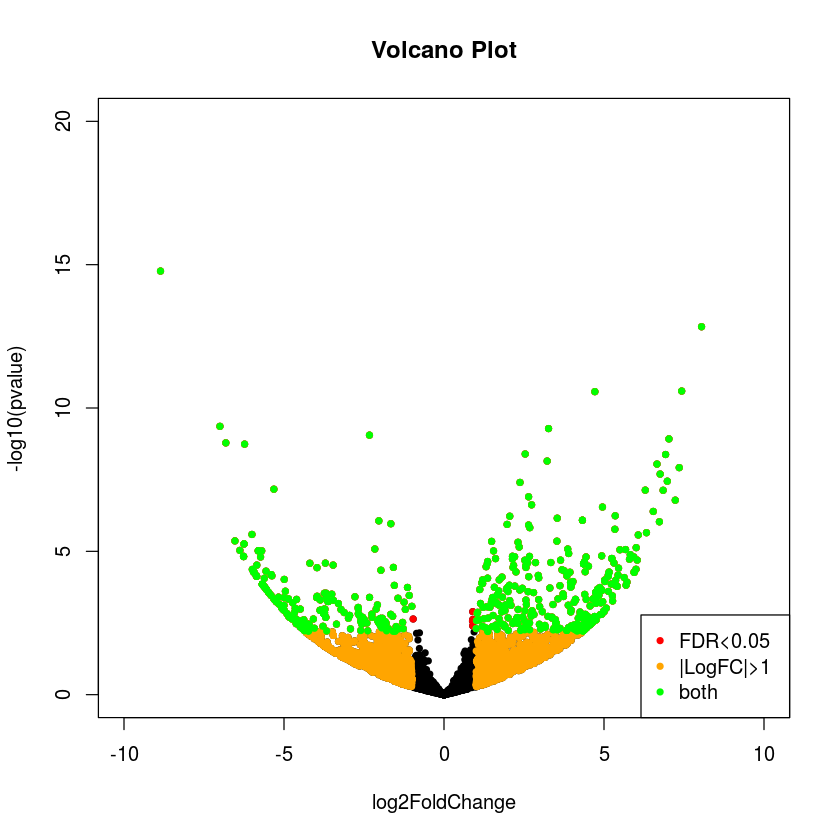

In [14]:
volcanoplot(resdata, lfcthresh=1, sigthresh=0.05, textcx=.8, xlim=c(-10,10), ylim=c(0, 20), labelsig=FALSE)
